<a href="https://colab.research.google.com/github/Nan0917/Neural-Network/blob/main/0524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

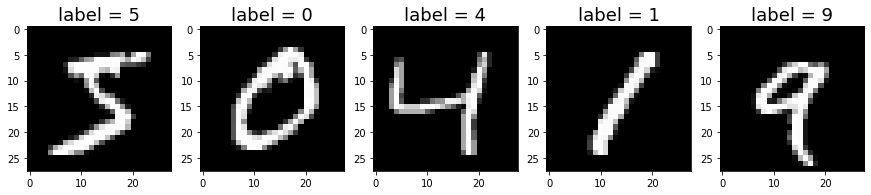

In [21]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 4)
for i in range(5):
      ax = plt.subplot(1, 5, i+1)
      ax.imshow(train_images[i], cmap= 'gray')
      ax.set_title('label = '+str(train_labels[i]), fontsize=18)
        
plt.show()


In [24]:
x_train = train_images.reshape((60000, 28*28))
x_train = x_train.astype('float32') / 255

x_test = test_images.reshape((10000, 28*28))
x_test = x_test.astype('float32') / 255

In [25]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_dim= 784))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
              metrics=['acc'])

In [28]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2552 - acc: 0.9265
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1031 - acc: 0.9693
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0677 - acc: 0.9801
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0496 - acc: 0.9850
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0371 - acc: 0.9891


In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('對測試資料集的準確率: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0727 - acc: 0.9789
對測試資料集的準確率:  0.9789000153541565


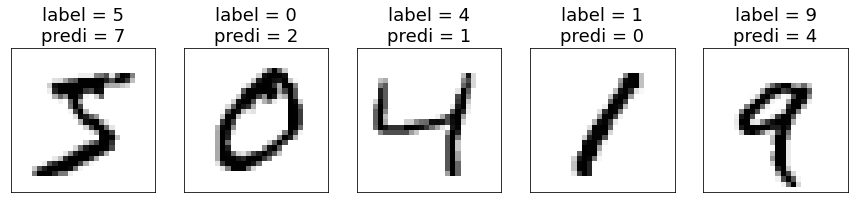

In [33]:
import numpy as np
predict = model.predict(x_test)
predict = np.argmax(predict, axis=1)
plt.gcf().set_size_inches(15, 4)
for i in range(5):
      ax = plt.subplot(1, 5, i+1)
      ax.imshow(train_images[i], cmap= 'binary')
      ax.set_title('label = '+str(train_labels[i]) +
                   '\npredi = '+str(predict[i]), fontsize=18)
      ax.set_xticks([]); ax.set_yticks([])
        
plt.show()